

# Project: TMDB Movie Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The TMDB movie dataset contains a list of movies from 1960 to 2015. Each movie is provided with details such as its revenue, budget, cast, director, runtime, release year etc. These column values would be used to draw analogy and in gaining more insights on the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning
- Dropped the insignificant columns

In [6]:

df.drop(['homepage','tagline','keywords','production_companies','overview'],axis=1,inplace=True)

- Checking the column counts

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


- Checking and verifying before dropping columns whether data in other columns have important values or not.

In [8]:
genre_null = df.query('genres.isnull()')
genre_null.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.0,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.0,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009,0.0,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009,0.0,0.0


- Dropping all the columns having null values

In [9]:
df_new = df.copy()
df_new.dropna(inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10727 entries, 0 to 10865
Data columns (total 16 columns):
id                10727 non-null int64
imdb_id           10727 non-null object
popularity        10727 non-null float64
budget            10727 non-null int64
revenue           10727 non-null int64
original_title    10727 non-null object
cast              10727 non-null object
director          10727 non-null object
runtime           10727 non-null int64
genres            10727 non-null object
release_date      10727 non-null object
vote_count        10727 non-null int64
vote_average      10727 non-null float64
release_year      10727 non-null int64
budget_adj        10727 non-null float64
revenue_adj       10727 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


- Checking for duplicate columns

In [10]:
sum(df_new.duplicated())

1

- Dropping the duplicates

In [11]:
df_new.drop_duplicates(inplace=True)

- Discarding rows having Zero in columns like revenue or budget

In [12]:
df_new = df_new[(df_new.revenue != 0) & (df_new.budget != 0)]

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 16 columns):
id                3849 non-null int64
imdb_id           3849 non-null object
popularity        3849 non-null float64
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
release_date      3849 non-null object
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
budget_adj        3849 non-null float64
revenue_adj       3849 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 511.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis
### 1. Which are the most popular movies in each year based on IMDB popularity chart?
***

#### In the below code we will find out the most popular movies in each year based on the popularity count.
> - The dataframe is grouped by release year and then the indexes of movies having max popularity in each year is stored in a variable. 
> - Using those indexes in the original dataFrame, most popular films in each year is then filtered out.
> - Index is then set as release_year and only Title column displayed along with it in descending order.

In [14]:

index1 = df_new.groupby("release_year").popularity.idxmax()
df_plot1 = df_new.loc[index1,:]
df_new.loc[index1,:].set_index('release_year')['original_title'].sort_index(ascending=False)

release_year
2015                                       Jurassic World
2014                                         Interstellar
2013                                               Frozen
2012                                         The Avengers
2011                   Captain America: The First Avenger
2010                                            Inception
2009                                               Avatar
2008                                      The Dark Knight
2007             Pirates of the Caribbean: At World's End
2006                                Underworld: Evolution
2005                  Harry Potter and the Goblet of Fire
2004             Harry Potter and the Prisoner of Azkaban
2003        The Lord of the Rings: The Return of the King
2002                The Lord of the Rings: The Two Towers
2001    The Lord of the Rings: The Fellowship of the Ring
2000                                            Gladiator
1999                                           Fight Club
1

#### Below bar graph displays the popularity of the most popular film in each year

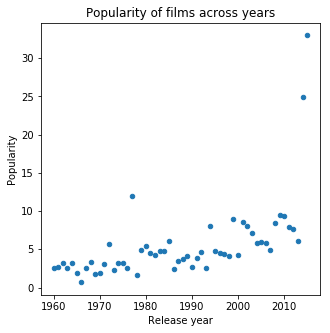

In [80]:
df_plot1.plot('release_year','popularity',kind='scatter',figsize=(5,5));
plt.xlabel('Release year')
plt.ylabel('Popularity')
plt.title('Popularity of films across years')
plt.show();

### 2. Which genres of movies are released most in each year? 
> Grouped genres by year and found out the maximum genre value count per year. Plotted the value count of most popular genre in each year.

In [112]:
df_gen1 = df_new.copy()
def separate(data):
    return data.str.split('|',expand=True).stack()
separate(df_gen1['genres']).value_counts()

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
dtype: int64

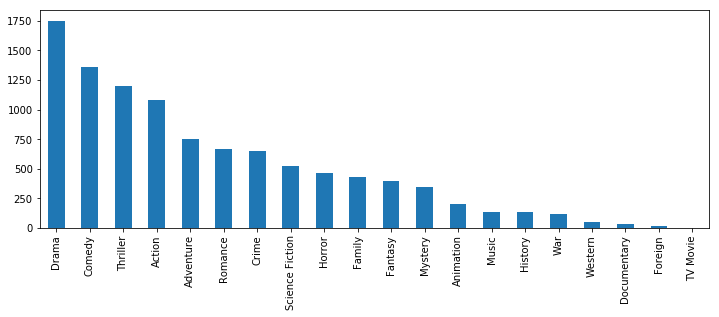

In [64]:
df_gen3 = df_gen2.stack().value_counts()
df_gen3.plot(kind='bar',figsize=(12,4));

In [113]:

df_gen= df_new.groupby('release_year').genres.apply(lambda x: x.value_counts().head(1))  
df_gen5 = df_new.copy()
df_gen5.groupby('release_year').apply(separate(df_gen1['genres']).value_counts().head(1),axis=0)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

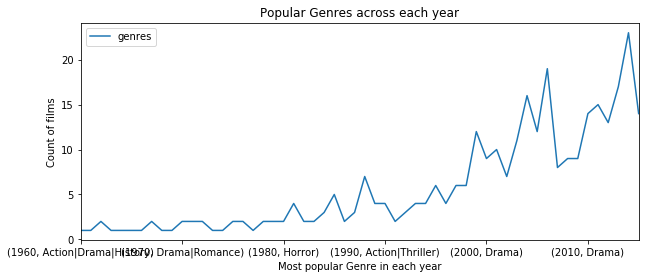

In [17]:
df_gen.plot(figsize=(10,4));
plt.xlabel('Most popular Genre in each year')
plt.ylabel('Count of films')
plt.title('Popular Genres across each year')
plt.legend();

### 3. Has the average runtime of movies increased or decreased?
> Grouped total runtime per total movie count by year. Plotted the average runtime trend across years.

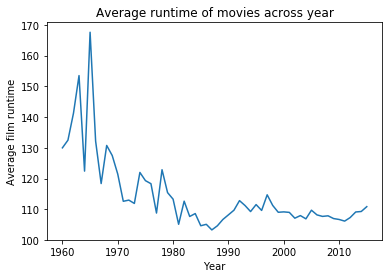

In [18]:
runtime = df_new.groupby('release_year').sum()['runtime']
idcount = df_new.groupby('release_year').count()['id']
plt.plot(runtime/idcount);
plt.xlabel('Year')
plt.ylabel('Average film runtime')
plt.title('Average runtime of movies across year')
plt.show();

### 4. Which movies earned most profit when inflation is not accounted over ?
> Created a new DataFrame with new column as Profit. This column will contain the difference between the Revenue earned by movie and its budget and sorted the records based on maximum profit. Later plotted the graph of First 20 rows in the dataframe along with the profit that they earned.

In [19]:

df_new1 = ((df_new.revenue - df_new.budget)).sort_values(ascending=False)
df_profit = df_new.loc[df_new1.index.tolist()]
df_profit['profit'] = df_profit.revenue - df_profit.budget
df_profit.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2544505847
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,1645034188
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


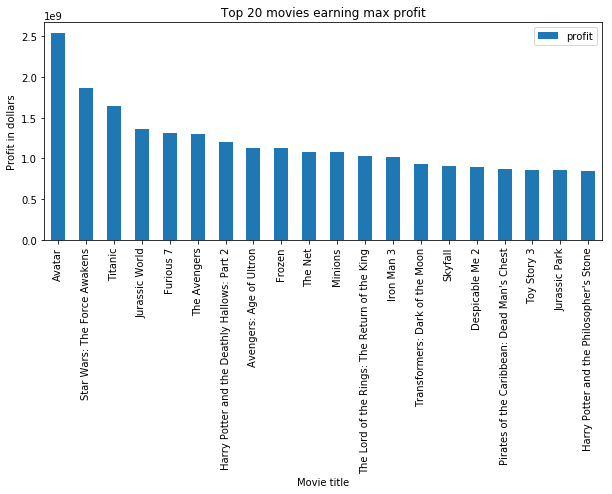

In [20]:
df_profit.head(20).plot('original_title','profit',kind='bar',figsize=(10,4));
plt.xlabel('Movie title')
plt.ylabel('Profit in dollars')
plt.title('Top 20 movies earning max profit')
plt.legend();

### 5. Which movies earned most profit when inflation is adjusted based on 2010 dollar value?
> Created a new DataFrame with new column as Profit_adj. This column will contain the difference between the Revenue_adj earned by movie and its budget_adj and sorted the records based on maximum profit. Later plotted the graph of First 20 rows in the dataframe along with the profit that they earned.

- Note: Revenue_adj and Budget_adj are values adjusted in terms of 2010 dollar value.

In [21]:
df_new2 = ((df_new.revenue_adj - df_new.budget_adj)).sort_values(ascending=False)
df_profit_adj = df_new.loc[df_new2.index.tolist()]
df_profit_adj['profit_adj'] = df_profit.revenue_adj - df_profit.budget_adj
df_profit_adj.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09


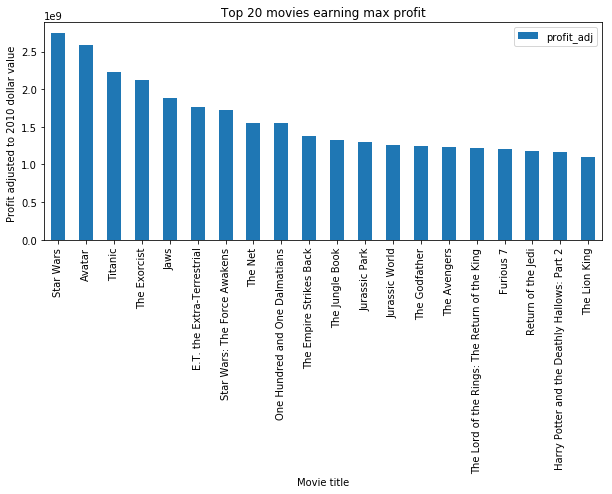

In [22]:
df_profit_adj.head(20).plot('original_title','profit_adj',kind='bar',figsize=(10,4));
plt.xlabel('Movie title')
plt.ylabel('Profit adjusted to 2010 dollar value ')
plt.title('Top 20 movies earning max profit')
plt.legend();

### 6. Which is the most popular film based on audience vote?
> - Sorted all the movies based on Vote_average.
> - If a movie has same Vote_average, it is further sorted based on maximum number of Vote_count.
> - Ignored the movies which had either of budget or revenue value as Zero.

In [26]:
df_vote = df_new.copy()
df_vote.sort_values(by =['vote_average','vote_count'],inplace= True,ascending=False)

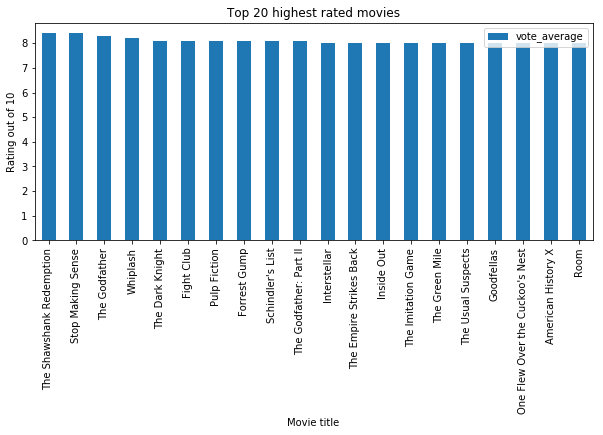

In [27]:
df_vote.head(20).plot('original_title','vote_average',kind='bar',figsize=(10,4));
plt.title('Top 20 highest rated movies')
plt.xlabel('Movie title')
plt.ylabel('Rating out of 10')
plt.legend();

<a id='conclusions'></a>
## Conclusions


> #### 1. From question 1, we found out all the films in each year which are most popular based on IMDB popularity rating. We can conclude from the visualization that the popularity of each of these movies has increased over the years.
> #### 2. From question 2, we can conclude that Comedy and Drama are the most popular genres over the years.
> #### 3. Question 3 threw insight on the fact that the average runtime of movies has decreased over the years. 
> #### 4. Through Question 4 and 5, we listed the most profit earning movies of all time when inflation is not accounted and accounted respectively. We can conclude that Star Wars is the most profit earning film when inflation is accounted and AVATAR would the most profit earning movie of all time when inflation is not accounted.
> #### 5. Shawshank redemption is the most highest rated commercial movie of all time.
***